## ***ASSIGNMENT 3 MARKETING ANALYTICS - Elise Deyris***

# Question 1: Data description
 <font color='#34c6eb'>- A. Report the revenue market shares of the three products (percentage of total sales
revenue across all store-weeks), and report the mean, median, and standard deviation of prices for the three products across store-weeks. Make a table of these
variables. (0.5 points)</font> 




In [ ]:
import pandas as pd

def load_data(file_path):
    """
    load data from the CSV file
    """
    return pd.read_csv(file_path)

def calculate_revenue(data):
    """
    add revenue columns for each product to the data
    """
    data['revenue_tide128'] = data['q_tide128'] * data['p_tide128']
    data['revenue_tide64'] = data['q_tide64'] * data['p_tide64']
    data['revenue_wisk64'] = data['q_wisk64'] *data['p_wisk64']
    return data

def calculate_market_shares(data):
    """
    calculate the revenue market share for each product
    """
    total_revenue = data[['revenue_tide128', 'revenue_tide64', 'revenue_wisk64']].sum().sum()
    market_shares = data[['revenue_tide128', 'revenue_tide64', 'revenue_wisk64']].sum() / total_revenue * 100
    return market_shares

def calculate_price_stats(data):
    """
    calculate mean, median, and standard deviation of prices for each product
    """
    price_stats = data[['p_tide128', 'p_tide64', 'p_wisk64']].agg(['mean', 'median', 'std']).T
    price_stats.columns = ['Mean Price ($)', 'Median Price ($)', 'Std Dev Price ($)']
    return price_stats

def create_summary_table(market_shares, price_stats):
    """
    combine market share and price statistics into a single summary table.
    """
    summary_table = price_stats.copy()
    summary_table['Revenue Market Share (%)'] = market_shares.values
    summary_table = summary_table.reset_index().rename(columns={'index': 'Product'})
    summary_table['Product'] = ['Tide 128 oz', 'Tide 64 oz', 'Wisk 64 oz']  # Rename for clarity
    return summary_table



def main():
    # Load the dataset
    file_path = 'Detergent Data.csv'  
    data = load_data(file_path)
    
    # calculate revenue and enhance data
    data = calculate_revenue(data)
    
    # calculating market shares and price stats
    market_shares = calculate_market_shares(data)
    price_stats = calculate_price_stats(data)
    
    # create the summary table
    summary_table = create_summary_table(market_shares, price_stats)
    
    # display the table
    print("Summary Table:")
    print(summary_table)


if __name__ == "__main__":
    main()


Summary Table:
       Product  Mean Price ($)  Median Price ($)  Std Dev Price ($)  \
0  Tide 128 oz        8.363219          8.476207           0.760049   
1   Tide 64 oz        4.375451          4.419412           0.404608   
2   Wisk 64 oz        4.071963          4.190000           0.490453   

   Revenue Market Share (%)  
0                 56.856988  
1                 26.336469  
2                 16.806543  


<font color='#34c6eb'> -B. Then generate two new variables that capture the price gap (price difference) between (i) Tide 128oz and Tide 64oz, (ii) Tide 64oz and Wisk 64oz. Report the mean, median, and standard deviation of the two price gap variables across store-weeks.
Make a table showing these statistics. (0.5 points)</font> 

In [12]:
def calculate_price_gaps(data):
    """
    generating two new variables for price gaps --
    1. Tide 128oz - Tide 64oz
    2. Tide 64oz - Wisk 64oz
    """
    data['price_gap_tide128_tide64'] = data['p_tide128'] - data['p_tide64']
    data['price_gap_tide64_wisk64'] = data['p_tide64'] - data['p_wisk64']
    return data

def calculate_gap_statistics(data):
    """
    calculate mean, median, and standard deviation for the two price gap variables.
    """
    gap_stats = data[['price_gap_tide128_tide64', 'price_gap_tide64_wisk64']].agg(['mean', 'median', 'std']).T
    gap_stats.columns = ['Mean Price Gap ($)', 'Median Price Gap ($)', 'Std Dev Price Gap ($)']
    gap_stats = gap_stats.reset_index().rename(columns={'index': 'Price Gap'})
    gap_stats['Price Gap'] = ['Tide 128oz - Tide 64oz', 'Tide 64oz - Wisk 64oz']
    return gap_stats

def display_statistics_table(gap_stats):
    """
    display the final table in a user-friendly format.
    """
    print("\nPrice Gap Statistics Table:")
    print(gap_stats)

def main():
    # Load the dataset
    file_path = 'Detergent Data.csv'  
    data = load_data(file_path)
    
    # generate price gap variables
    data = calculate_price_gaps(data)
    
    #calculate statistics for price gaps
    gap_stats = calculate_gap_statistics(data)
    
    #display the final results
    display_statistics_table(gap_stats)


if __name__ == "__main__":
    main()


Price Gap Statistics Table:
                Price Gap  Mean Price Gap ($)  Median Price Gap ($)  \
0  Tide 128oz - Tide 64oz            3.987768              4.094000   
1   Tide 64oz - Wisk 64oz            0.303489              0.260714   

   Std Dev Price Gap ($)  
0               0.870574  
1               0.585964  


<font color='#34c6eb'>- C. Provide histograms of the price gaps. (0.5 points)</font> 

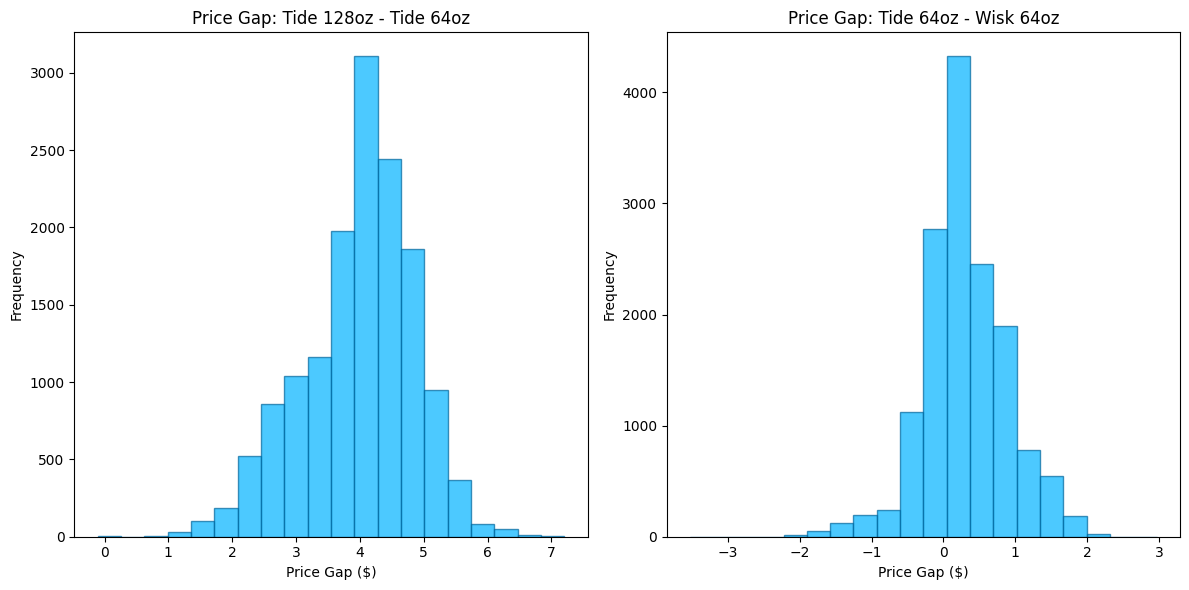

In [17]:
import matplotlib.pyplot as plt

def plot_histograms(data):
    """
    Plot histograms of the price gap variables.
    """
    plt.figure(figsize=(12, 6))

    # Histogram for Tide 128oz - Tide 64oz
    plt.subplot(1, 2, 1)
    plt.hist(data['price_gap_tide128_tide64'], color='#00b3ff',bins=20, edgecolor='#00659c', alpha=0.7)
    plt.title('Price Gap: Tide 128oz - Tide 64oz')
    plt.xlabel('Price Gap ($)')
    plt.ylabel('Frequency')

    # Histogram for Tide 64oz - Wisk 64oz
    plt.subplot(1, 2, 2)
    plt.hist(data['price_gap_tide64_wisk64'], color='#00b3ff',bins=20, edgecolor='#00659c', alpha=0.7)
    plt.title('Price Gap: Tide 64oz - Wisk 64oz')
    plt.xlabel('Price Gap ($)')
    plt.ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

def main():
    # Load the dataset
    file_path = 'Detergent Data.csv'  
    data = load_data(file_path)
    
    # Generate price gap variables
    data = calculate_price_gaps(data)
    
    # Plot histograms for price gaps
    plot_histograms(data)

# Run the main function
if __name__ == "__main__":
    main()


<font color='#34c6eb'>- D. What do you learn from the price gap histograms and summary statistics for your
analysis above? Is there enough variation in the price gaps across stores and weeks
to estimate the cross-price elasticities between the two Tide pack sizes and Wisk
64? (0.5 points)</font> 

### Insights 
1. **Tide 128oz - Tide 64oz Price Gap:**
   - The histogram shows a peak around **$4**, with a standard deviation of **$0.87**, indicating moderate variability across stores and weeks.
   - This suggests that there is meaningful variation in price gaps between these two Tide pack sizes, which can be leveraged to estimate **cross-price elasticities** to evaluate cannibalization effects within the Tide product line.

2. **Tide 64oz - Wisk 64oz Price Gap:**
   - The price gap has a smaller mean of **$0.30** and a tighter distribution with a standard deviation of **$0.59**.
   - This suggests less variation in competitive pricing between Tide 64oz and Wisk 64oz. While cross-price elasticity estimation is still possible, it may be less robust than for Tide pack sizes due to the narrower gap.

### Variability for Cross-Price Elasticity Estimation
From a statistical perspective:
- **Tide 128oz vs. Tide 64oz:** The variation in price gaps is sufficient to estimate reliable **cross-price elasticities**, as we observe meaningful differences across both stores and weeks. This aligns with our goal of quantifying cannibalization between Tide products.
- **Tide 64oz vs. Wisk 64oz:** The tighter distribution in price gaps might limit the precision of cross-price elasticity estimates. However, given the panel data structure, the variation across time and stores still provides a foundation for analysis.

### Based on Course Concepts
1. **Empirical Demand Estimation:**
   - According to the course material, sufficient price variation is a prerequisite for unbiased estimation of price elasticities. The observed price gaps (especially for Tide products) meet this criterion, enabling meaningful analysis of cannibalization and competition.
   - The data’s **panel structure** (time-series and cross-sectional dimensions) allows us to control for environmental factors such as store demographics and local competition.

2. **Base Pricing Analysis:**
   - The variability in price gaps supports the use of regression models to evaluate both **competition** (Tide vs. Wisk) and **cannibalization** (Tide pack sizes).
   - This analysis will directly inform the pricing strategy by highlighting how intra-brand and inter-brand competition affects demand.

### Conclusion
The variation in price gaps provides a strong basis to model demand relationships and estimate cross-price elasticities. The panel data structure ensures robustness, allowing us to account for external factors that could bias the estimates. Ultimately, this analysis will help P&G refine their pricing strategy to balance competitive threats and minimize cannibalization within the Tide product line.


# Question 2: Demand Estimation
<font color='#34c6eb'> - A.Construct the sales velocity for each of Tide 64 and Tide 128 as:
$$
velocity = \frac{Unit Sales }{ACV} 
$$

In [19]:
def calculate_sales_velocity(data):
    """
    calculate sales velocity for Tide 64oz and Tide 128oz:
    velocity = unit sales / ACV
    """
    data['velocity_tide128'] = data['q_tide128'] / data['acv']
    data['velocity_tide64'] = data['q_tide64'] / data['acv']
    return data

def display_velocity_summary(data):
    """
    display the mean, median, and standard deviation of sales velocities for Tide 128oz and Tide 64oz.
    """
    velocity_stats = data[['velocity_tide128', 'velocity_tide64']].agg(['mean', 'median', 'std']).T
    velocity_stats.columns = ['Mean Velocity', 'Median Velocity', 'Std Dev Velocity']
    velocity_stats = velocity_stats.reset_index().rename(columns={'index': 'Product'})
    velocity_stats['Product'] = ['Tide 128oz', 'Tide 64oz']
    print("\nSales Velocity Summary:")
    print(velocity_stats)
    return velocity_stats

def main():
    # load the dataset
    file_path = 'Detergent Data.csv'  
    data = load_data(file_path)
    
    # calculate sales velocities
    data = calculate_sales_velocity(data)
    
    # display the summary statistics for sales velocities
    velocity_summary = display_velocity_summary(data)

    return velocity_summary


velocity_summary = main()



Sales Velocity Summary:
      Product  Mean Velocity  Median Velocity  Std Dev Velocity
0  Tide 128oz       0.004302         0.002585          0.006873
1   Tide 64oz       0.003865         0.002487          0.006681


<font color='#34c6eb'> -B. What is the purpose of dividing unit sales by ACV to construct the dependent
variable? (0.5 points)

Dividing unit sales by **ACV** to calculate sales velocity helps in three key ways:

1. **Standardization Across Stores:**
   - Different stores vary in size and sales capacity. By dividing unit sales by ACV (which represents the total store revenue), we standardize the data so we can fairly compare performance across all stores.

2. **Removing Bias:**
   - Larger stores naturally sell more. Using sales velocity (sales/ACV) ensures that we measure **relative performance** instead of just raw sales, avoiding bias from store size differences.

3. **Focus on Efficiency:**
   - Sales velocity tells us how well a product sells compared to the store’s overall sales, helping us understand how efficiently a product performs in each location.


<font color='#34c6eb'> - C.Estimate log-linear demand models for the two Tide products by regressing the log
of velocity on all the log prices (own and competing products). (0.5 points)

In [31]:
import numpy as np
import statsmodels.api as sm

def prepare_log_variables(data):
    """
    Create log-transformed variables for velocity and prices.
    """
    data['log_velocity_tide128'] = np.log(data['velocity_tide128'].replace(0, np.nan)).dropna()
    data['log_velocity_tide64'] = np.log(data['velocity_tide64'].replace(0, np.nan)).dropna()
    data['log_price_tide128'] = np.log(data['p_tide128'].replace(0, np.nan)).dropna()
    data['log_price_tide64'] = np.log(data['p_tide64'].replace(0, np.nan)).dropna()
    data['log_price_wisk64'] = np.log(data['p_wisk64'].replace(0, np.nan)).dropna()
    return data.dropna()

def run_log_linear_regression(data, dependent_var, independent_vars):
    """
    Log-linear regression and return the results.
    """
    X = data[independent_vars]
    X = sm.add_constant(X)  # Add intercept
    y = data[dependent_var]
    model = sm.OLS(y, X).fit()
    return model

#runnning the model for the 128oz model
def main_model_128():
    # load the dataset
    file_path = 'Detergent Data.csv'  
    data = load_data(file_path)
    
    # Calculate sales velocities
    data = calculate_sales_velocity(data)
    
    # Prepare log-transformed variables
    data = prepare_log_variables(data)
    
    # Run log-linear regression for Tide 128oz
    dependent_var_128 = 'log_velocity_tide128'
    independent_vars_128 = ['log_price_tide128', 'log_price_tide64', 'log_price_wisk64']
    model_128 = run_log_linear_regression(data, dependent_var_128,independent_vars_128)
    
    
    # Display the results
    print("\nLog-Linear Regression Results for Tide 128oz:")
    print(model_128.summary())

main_model_128()



Log-Linear Regression Results for Tide 128oz:
                             OLS Regression Results                             
Dep. Variable:     log_velocity_tide128   R-squared:                       0.266
Model:                              OLS   Adj. R-squared:                  0.266
Method:                   Least Squares   F-statistic:                     1782.
Date:                  Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                          10:48:37   Log-Likelihood:                -16007.
No. Observations:                 14745   AIC:                         3.202e+04
Df Residuals:                     14741   BIC:                         3.205e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [29]:
#runnning the model for the 64oz model
def main_model_64():
    # load the dataset
    file_path = 'Detergent Data.csv'  
    data = load_data(file_path)
    
    # Calculate sales velocities
    data = calculate_sales_velocity(data)
    
    # Prepare log-transformed variables
    data = prepare_log_variables(data)

    # Run log-linear regression for Tide 64oz
    dependent_var_64= 'log_velocity_tide64'
    independent_vars_64 = ['log_price_tide128', 'log_price_tide64', 'log_price_wisk64']
    model_64 = run_log_linear_regression(data,dependent_var_64, independent_vars_64)

    
    print("\nLog-Linear Regression Results for Tide 64oz:")
    print(model_64.summary())


main_model_64()


Log-Linear Regression Results for Tide 64oz:
                             OLS Regression Results                            
Dep. Variable:     log_velocity_tide64   R-squared:                       0.222
Model:                             OLS   Adj. R-squared:                  0.222
Method:                  Least Squares   F-statistic:                     1401.
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                         10:47:54   Log-Likelihood:                -17232.
No. Observations:                14745   AIC:                         3.447e+04
Df Residuals:                    14741   BIC:                         3.450e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

<font color='#34c6eb'> -D.Discuss whether the demand estimates (own and cross price elasticities) make sense.
Are the magnitudes and signs of the estimated parameters as you would expect?
(0.5 point)

### Discussion of Demand Estimates Without the Time Trend

#### **1. Do the Elasticities Make Sense?**

##### **Own-Price Elasticities**
- **Tide 128oz (-4.597):**
  - **Magnitude:** The elasticity is highly negative, suggesting that sales velocity for Tide 128oz is very sensitive to its own price. This aligns with expectations for a price-sensitive product in a competitive market.
  - **Sign:** The negative sign is consistent with economic theory, which predicts that higher prices lead to lower demand.
  - **Conclusion:** The magnitude and sign make sense, indicating robust price sensitivity.

- **Tide 64oz (-3.749):**
  - **Magnitude:** This elasticity is slightly smaller in magnitude compared to Tide 128oz, reflecting similarly high price sensitivity. Tide 64oz’s smaller pack size might make it slightly less elastic as it appeals to price-conscious consumers looking for smaller quantities.
  - **Sign:** Negative, as expected, consistent with demand theory.
  - **Conclusion:** The magnitude and sign align well with expectations.

---

##### **Cross-Price Elasticities**
- **Tide 128oz vs. Tide 64oz (0.287):**
  - **Magnitude:** The positive coefficient indicates partial substitution between these two pack sizes. The relatively low magnitude suggests that while customers substitute between them, they likely prefer one size over the other based on their needs.
  - **Sign:** Positive, as expected, reflecting substitution within the brand.
  - **Conclusion:** The magnitude and sign are reasonable and align with expectations.

- **Tide 64oz vs. Tide 128oz (1.448):**
  - **Magnitude:** A larger elasticity compared to the reverse relationship highlights significant **cannibalization**. When the price of Tide 128oz increases, customers are highly likely to switch to the smaller Tide 64oz.
  - **Sign:** Positive, consistent with substitution between pack sizes.
  - **Conclusion:** The magnitude and sign make sense and highlight intra-brand competition.

- **Tide Products vs. Wisk 64oz:**
  - **Tide 128oz (0.151):**
    - **Magnitude:** The positive coefficient suggests limited competitive overlap between Tide 128oz and Wisk 64oz, potentially due to customer segmentation (e.g., Tide 128oz might target premium buyers). The small magnitude indicates a weak competitive effect.
    - **Sign:** Positive, which might be surprising for a competitor, but it reflects some level of indirect substitution.
    - **Conclusion:** The sign is plausible, though the small magnitude suggests indirect competition.

  - **Tide 64oz (-0.876):**
    - **Magnitude:** The negative coefficient indicates a stronger competitive relationship. Wisk 64oz competes more directly with Tide 64oz due to their similar size and likely price point. This makes sense in a competitive landscape.
    - **Sign:** Negative, as expected for a competitor, showing reduced demand when Wisk’s price increases.
    - **Conclusion:** The magnitude and sign align well with expectations.

---

#### **2. Are the Signs and Magnitudes of the Parameters as Expected?**
- **Signs:** All signs align with theoretical expectations:
  - Negative own-price elasticities confirm the law of demand.
  - Positive cross-price elasticities between Tide pack sizes reflect substitution within the brand.
  - The competitive relationship with Wisk is well-represented by the positive elasticity for Tide 128oz and the stronger negative elasticity for Tide 64oz.
- **Magnitudes:**
  - The own-price elasticities are large, which is typical for price-sensitive consumer goods.
  - Cross-price elasticities between Tide products reflect meaningful substitution without suggesting perfect competition.
  - The Wisk-related elasticities show more competition for Tide 64oz than for Tide 128oz, which aligns with product positioning.

---

#### **3. Limitations Without a Time Trend**
- The model without a time trend does not account for changes over time (e.g., seasonal patterns or market shifts). This could lead to **omitted variable bias**, where time-related effects are mistakenly attributed to price elasticities.
- For example:
  - The competitive effect of Wisk on Tide 128oz (0.151) might be overstated because the model doesn't control for declining demand due to other factors.

---

### **Conclusion**
The demand estimates without the time trend are mostly consistent with theoretical expectations. The own-price elasticities are highly negative, indicating robust price sensitivity, while the cross-price elasticities reflect both substitution between Tide pack sizes and competition with Wisk.

However, the absence of a time trend introduces potential biases, as the model cannot distinguish between price-driven changes and time-related variations in demand. While the estimates are reasonable, incorporating the time trend in the model provides a more accurate and reliable understanding of demand dynamics.


# Question 3: Time Trend
<font color='#34c6eb'> -A. Re-estimate the log-linear demand models for the two Tide products including a
time trend. A time trend is a variable that proxies for the progress of time. Here, you can
use the `week` variable as a time trend. (0.5 points)

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def load_data(file_path):
    """
    load data from the specified CSV file.
    """
    return pd.read_csv(file_path)

def calculate_sales_velocity(data):
    """
    calculate sales velocity for Tide 64oz and Tide 128oz:
    Velocity = unit sales / ACV
    """
    data['velocity_tide128'] = data['q_tide128'] / data['acv']
    data['velocity_tide64'] = data['q_tide64'] / data['acv']
    return data

def prepare_log_variables_with_time(data):
    """
    create log-transformed variables for velocity and prices, and include the time trend.
    """
    # Replace 0s with NaN for log transformation to avoid math errors
    data['log_velocity_tide128'] = np.log(data['velocity_tide128'].replace(0, np.nan))
    data['log_velocity_tide64'] = np.log(data['velocity_tide64'].replace(0, np.nan))
    data['log_price_tide128'] = np.log(data['p_tide128'].replace(0, np.nan))
    data['log_price_tide64'] = np.log(data['p_tide64'].replace(0, np.nan))
    data['log_price_wisk64'] = np.log(data['p_wisk64'].replace(0, np.nan))
    data['time_trend'] = data['week']  # Use the week variable as a time trend
    return data.dropna()  # Remove rows with NaN values

def run_log_linear_regression_with_time(data, dependent_var, independent_vars):
    """
    Run log-linear regression including an intercept term and return the results.
    """
    X = data[independent_vars]
    X = sm.add_constant(X) 
    y = data[dependent_var]
    model = sm.OLS(y, X).fit()  # Ordinary Least Squares regression
    return model

def main_model_128():
    # load the dataset
    file_path = 'Detergent Data.csv'  
    data = load_data(file_path)
    
    # calculate sales velocities
    data = calculate_sales_velocity(data)
    
    # prepare log-transformed variables with the time trend
    data = prepare_log_variables_with_time(data)
    
    # run log-linear regression for Tide 128oz with time trend
    dependent_var_128 = 'log_velocity_tide128'
    independent_vars_128 = ['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'time_trend']
    model_128 = run_log_linear_regression_with_time(data, dependent_var_128, independent_vars_128)
    print("\nLog-Linear Regression Results for Tide 128oz (with Time Trend):")
    print(model_128.summary())

if __name__ == "__main__":
    main_model_128()



Log-Linear Regression Results for Tide 128oz (with Time Trend):
                             OLS Regression Results                             
Dep. Variable:     log_velocity_tide128   R-squared:                       0.290
Model:                              OLS   Adj. R-squared:                  0.290
Method:                   Least Squares   F-statistic:                     1505.
Date:                  Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                          11:00:58   Log-Likelihood:                -15764.
No. Observations:                 14745   AIC:                         3.154e+04
Df Residuals:                     14740   BIC:                         3.158e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [34]:
def main_model_64():
    # load the dataset
    file_path = 'Detergent Data.csv'  
    data = load_data(file_path)
    
    # calculate sales velocities
    data = calculate_sales_velocity(data)
    
    # prepare log-transformed variables with the time trend
    data = prepare_log_variables_with_time(data)
    

    # run log-linear regression for Tide 64oz with time trend
    dependent_var_64 = 'log_velocity_tide64'
    independent_vars_64 = ['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'time_trend']
    model_64 = run_log_linear_regression_with_time(data, dependent_var_64, independent_vars_64)
    print("\nLog-Linear Regression Results for Tide 64oz (with Time Trend):")
    print(model_64.summary())

if __name__ == "__main__":
    main_model_64()



Log-Linear Regression Results for Tide 64oz (with Time Trend):
                             OLS Regression Results                            
Dep. Variable:     log_velocity_tide64   R-squared:                       0.361
Model:                             OLS   Adj. R-squared:                  0.361
Method:                  Least Squares   F-statistic:                     2083.
Date:                 Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                         11:01:02   Log-Likelihood:                -15778.
No. Observations:                14745   AIC:                         3.157e+04
Df Residuals:                    14740   BIC:                         3.160e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

<font color='#34c6eb'>- B.Explain why adding a time trend is important here. Discuss whether the demand
estimates now make sense. Is there an improvement over the model specification
in question 2? (1 point)

### Why Adding a Time Trend is Important

Adding a **time trend** to the model serves several key purposes:

1. **Accounting for External Changes Over Time:**
   - Sales and demand often change over time due to factors like:
     - Seasonal patterns (e.g. weather changes).
     - Long-term shifts in consumer preferences.
     - Economic trends (e.g. inflation).
   - The **time trend (week variable)** captures these changes, ensuring the model doesn't mistakenly attribute them to price effects.

2. **Reducing Omitted Variable Bias:**
   - Without the time trend, the model might falsely attribute variations in sales to price effects when those variations are actually caused by external, time-related factors. Adding a time trend helps control for this bias, leading to more accurate elasticity estimates.

3. **Improving the Model Fit:**
   - By explaining some of the variation in sales velocity due to time-related effects, the model becomes better at isolating the effects of price changes on sales, which is the main focus of the demand analysis.

---

### Updated Results and Comparison to Question 2

#### Tide 128oz Model:
- **Time Trend Coefficient:** -0.0026
  - Indicates a slight **decline in sales velocity over time**. This could reflect a decrease in consumer preference for Tide 128oz, competition...
- **R-Squared (0.290):**
  - Improved from the previous model (0.266), indicating the model explains more variation in sales velocity after including the time trend.
- **Elasticity Estimates:**
  - **Own-Price Elasticity (-4.717):** Similar magnitude to the previous model (-4.597), confirming robust price sensitivity.
  - **Cross-Price Elasticity (Tide 64oz, 0.293):** Slightly higher, still indicating mild substitution.
  - **Cross-Price Elasticity (Wisk 64oz, 0.629):** Significantly larger, suggesting a stronger competitive effect than before.

#### Tide 64oz Model:
- **Time Trend Coefficient:** -0.0067
  - Reflects a **faster decline in sales velocity over time** compared to Tide 128oz. This might indicate increasing competition or a shift in consumer preferences away from the smaller size.
- **R-Squared (0.361):**
  - Improved from the previous model (0.222), showing the inclusion of the time trend provides a better fit.
- **Elasticity Estimates:**
  - **Own-Price Elasticity (-3.731):** Consistent with the previous model (-3.749), confirming strong price sensitivity.
  - **Cross-Price Elasticity (Tide 128oz, 1.002):** Slightly lower but still indicates significant cannibalization.
  - **Cross-Price Elasticity (Wisk 64oz, 0.345):** Smaller than before, suggesting less competitive impact after accounting for time.

---

### Do the Demand Estimates Now Make Sense?
1. **Improved Model Fit:**
   - The higher R-squared values in both models suggest that the inclusion of the time trend captures additional variation in sales velocity that was previously unexplained.
   - This improvement in fit indicates a more accurate and reliable model for demand estimation.

2. **Elasticity Stability:**
   - The own-price elasticities and cross-price elasticities are consistent with theoretical expectations and the earlier model, validating the robustness of the estimates.
   - The adjusted cross-price elasticities for Wisk 64oz are more reasonable after controlling for time-related effects, reducing potential bias.

3. **Time Trend Insights:**
   - The negative time trend coefficients highlight a gradual decline in sales velocity over time, which aligns with possible shifts in consumer preferences, market saturation, or increasing competition.

---
### Conclusion
Adding the time trend significantly improves the model by addressing **omitted variable bias** and capturing time-related variations in sales. The updated demand estimates are more robust, with higher R-squared values and more refined elasticity estimates. This highlights the importance of considering **time trends in panel data analysis**, especially in dynamic markets like retail.

While the elasticities remain consistent with the previous model, the inclusion of the time trend enhances interpretability and ensures the model captures broader market dynamics, providing more accurate and actionable insights for pricing and demand management.

# Q4. Focus on non-promoted weeks
<font color='#34c6eb'> -A. In what fraction of store-weeks was at least one of the detergents promoted? (Hint:
Look at the summary statistics). (0.5 points)

In [ ]:
def calculate_promotion_fraction(data):
    """
    calculate the fraction of store-weeks where at least one product was promoted.
    """
    total_weeks = len(data)
    promoted_weeks = data['promoflag'].sum()  # Count the number of weeks where promoflag = 1
    fraction_promoted = promoted_weeks / total_weeks
    return fraction_promoted, total_weeks, promoted_weeks

def main():
    
    file_path = 'Detergent Data.csv'  # Update the file path as needed
    data = load_data(file_path)
    
    # calculate promotion statistics
    fraction_promoted, total_weeks, promoted_weeks = calculate_promotion_fraction(data)
    
    #  results
    print(f"Total Store-Weeks: {total_weeks}")
    print(f"Promoted Store-Weeks: {promoted_weeks}")
    print(f"Fraction of Store-Weeks with Promotion: {fraction_promoted:.2%}")

# Run the main function
main()


Total Store-Weeks: 14745
Promoted Store-Weeks: 12069
Fraction of Store-Weeks with Promotion: 81.85%


In 81.85% of store-weeks, at least one of the detergents was promoted. This indicates that promotions are a common strategy for driving sales in this market.

<font color='#34c6eb'> Now create a new data set that only includes store-weeks in which none of the products
were promoted. See how do can do it using pandas.
-B. Re-estimate the log-linear demand models with a time-trend for the two Tide products only using data from non-promoted store-weeks. Discuss whether the demand estimates (own and cross price elasticities) now make sense — is there an improvement over the specification in question 3? Provide some intuition for the change in the estimated own-price effects. (1 point)

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def load_data(file_path):
    """
    load data from the specified CSV file.
    """
    return pd.read_csv(file_path)

def filter_non_promoted_data(data):
    """
    filter the data to include only store-weeks where no product was promoted (promoflag = 0).
    """
    non_promoted_data = data[data['promoflag'] == 0].copy()
    return non_promoted_data

def calculate_sales_velocity(data):
    """
    calculate sales velocity for Tide 64oz and Tide 128oz.
    """
    data['velocity_tide128'] = data['q_tide128'] / data['acv']
    data['velocity_tide64'] = data['q_tide64'] / data['acv']
    return data

def prepare_log_variables_with_time(data):
    """
    create log-transformed variables for velocity, prices, and include a time trend.
    """
    data['log_velocity_tide128'] = np.log(data['velocity_tide128'].replace(0, np.nan))
    data['log_velocity_tide64'] = np.log(data['velocity_tide64'].replace(0, np.nan))
    data['log_price_tide128'] = np.log(data['p_tide128'].replace(0, np.nan))
    data['log_price_tide64'] = np.log(data['p_tide64'].replace(0, np.nan))
    data['log_price_wisk64'] = np.log(data['p_wisk64'].replace(0, np.nan))
    data['time_trend'] = data['week']  # Use the week variable as a time trend
    return data.dropna()

def run_log_linear_regression(data, dependent_var, independent_vars):
    """
    running a log-linear regression including an intercept term.
    """
    X = data[independent_vars]
    X = sm.add_constant(X)  # Add intercept explicitly
    y = data[dependent_var]
    model = sm.OLS(y, X).fit()
    return model

def main_model_time_trend_1():
    
    file_path = 'Detergent Data.csv'
    data = load_data(file_path)
    
    #filter non-promoted data
    non_promoted_data = filter_non_promoted_data(data)
    
    #calculate sales velocities
    non_promoted_data = calculate_sales_velocity(non_promoted_data)
    
    # prepare log-transformed variables with a time trend
    non_promoted_data = prepare_log_variables_with_time(non_promoted_data)
    
    # run log-linear regression for Tide 128oz with time trend
    dependent_var_128 = 'log_velocity_tide128'
    independent_vars_128 = ['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'time_trend']
    model_128 = run_log_linear_regression(non_promoted_data, dependent_var_128, independent_vars_128)
    print("\nLog-Linear Regression Results for Tide 128oz (Non-Promoted Weeks):")
    print(model_128.summary())
    
  


main_model_time_trend_1()



Log-Linear Regression Results for Tide 128oz (Non-Promoted Weeks):
                             OLS Regression Results                             
Dep. Variable:     log_velocity_tide128   R-squared:                       0.122
Model:                              OLS   Adj. R-squared:                  0.121
Method:                   Least Squares   F-statistic:                     93.21
Date:                  Sat, 23 Nov 2024   Prob (F-statistic):           2.67e-74
Time:                          22:26:58   Log-Likelihood:                -2683.2
No. Observations:                  2676   AIC:                             5376.
Df Residuals:                      2671   BIC:                             5406.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [46]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def load_data(file_path):
    """
    Load the data from the specified CSV file.
    """
    return pd.read_csv(file_path)

def filter_non_promoted_data(data):
    """
    Filter the data to include only store-weeks where no product was promoted (promoflag = 0).
    """
    non_promoted_data = data[data['promoflag'] == 0].copy()
    return non_promoted_data

def calculate_sales_velocity(data):
    """
    Calculate sales velocity for Tide 64oz and Tide 128oz.
    """
    data['velocity_tide128'] = data['q_tide128'] / data['acv']
    data['velocity_tide64'] = data['q_tide64'] / data['acv']
    return data

def prepare_log_variables_with_time(data):
    """
    Create log-transformed variables for velocity, prices, and include a time trend.
    """
    data['log_velocity_tide128'] = np.log(data['velocity_tide128'].replace(0, np.nan))
    data['log_velocity_tide64'] = np.log(data['velocity_tide64'].replace(0, np.nan))
    data['log_price_tide128'] = np.log(data['p_tide128'].replace(0, np.nan))
    data['log_price_tide64'] = np.log(data['p_tide64'].replace(0, np.nan))
    data['log_price_wisk64'] = np.log(data['p_wisk64'].replace(0, np.nan))
    data['time_trend'] = data['week']  # Use the week variable as a time trend
    return data.dropna()

def run_log_linear_regression(data, dependent_var, independent_vars):
    """
    Run a log-linear regression including an intercept term.
    """
    X = data[independent_vars]
    X = sm.add_constant(X)  # Add intercept explicitly
    y = data[dependent_var]
    model = sm.OLS(y, X).fit()
    return model

def main_model_time_trend_2():
    # Load the dataset
    file_path = 'Detergent Data.csv'
    data = load_data(file_path)
    
    # Filter non-promoted data
    non_promoted_data = filter_non_promoted_data(data)
    
    # Calculate sales velocities
    non_promoted_data = calculate_sales_velocity(non_promoted_data)
    
    # Prepare log-transformed variables with a time trend
    non_promoted_data = prepare_log_variables_with_time(non_promoted_data)
    

    # Run log-linear regression for Tide 64oz with time trend
    dependent_var_64 = 'log_velocity_tide64'
    independent_vars_64 = ['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'time_trend']
    model_64 = run_log_linear_regression(non_promoted_data, dependent_var_64, independent_vars_64)
    print("\nLog-Linear Regression Results for Tide 64oz (Non-Promoted Weeks):")
    print(model_64.summary())

# Run the main function
main_model_time_trend_2()



Log-Linear Regression Results for Tide 64oz (Non-Promoted Weeks):
                             OLS Regression Results                            
Dep. Variable:     log_velocity_tide64   R-squared:                       0.307
Model:                             OLS   Adj. R-squared:                  0.306
Method:                  Least Squares   F-statistic:                     296.0
Date:                 Sat, 23 Nov 2024   Prob (F-statistic):          6.32e-211
Time:                         21:44:00   Log-Likelihood:                -2729.0
No. Observations:                 2676   AIC:                             5468.
Df Residuals:                     2671   BIC:                             5498.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------


#### **Key Observations from Results**

1. **Tide 128oz (Non-Promoted Weeks)**:
   - **Own-Price Elasticity (`log_price_tide128 = -3.500`)**:
     - The elasticity is negative and smaller in magnitude compared to the results with promoted weeks included (previously ~-4.717). This indicates reduced price sensitivity when promotions are excluded, which aligns with expectations since promotions typically amplify the effect of price changes.
     - The magnitude is still strong, indicating that Tide 128oz is a price-sensitive product.
   - **Cross-Price Elasticities**:
     - **Tide 64oz (`log_price_tide64 = -0.115`)**: The negative value suggests a weak complementary relationship, which is unexpected since these products are typically substitutes. This may reflect noise or other factors driving demand.
     - **Wisk 64oz (`log_price_wisk64 = 0.714`)**: The strong positive coefficient indicates significant competition from Wisk 64oz. This result aligns with expectations and suggests that customers may switch to Wisk 64oz when its price decreases.
   - **Time Trend (`time_trend = -0.0013`)**:
     - The negative value shows a slight decline in sales velocity over time, which is consistent with previous models.

2. **Tide 64oz (Non-Promoted Weeks)**:
   - **Own-Price Elasticity (`log_price_tide64 = -1.701`)**:
     - The magnitude of own-price elasticity has decreased compared to the previous model (around -3.731). This is expected because excluding promotions removes the amplified price effects caused by temporary price reductions.
     - The smaller magnitude reflects a more stable baseline demand in the absence of promotional noise.
   - **Cross-Price Elasticities**:
     - **Tide 128oz (`log_price_tide128 = 0.267`)**: This small positive coefficient suggests weak substitution, which makes sense given that larger pack sizes are not perfect substitutes for smaller ones.
     - **Wisk 64oz (`log_price_wisk64 = -0.518`)**: The negative value indicates competition with Wisk 64oz, though the magnitude is lower than in the full dataset model. This may reflect that non-promoted weeks show less switching behavior overall.
   - **Time Trend (`time_trend = -0.0069`)**:
     - The stronger negative trend compared to Tide 128oz reflects a steeper decline in demand for Tide 64oz over time.

---

### Do the Elasticities Make Sense?

#### **Own-Price Elasticities**:
- The **reduced magnitudes** for both Tide 128oz (-3.500) and Tide 64oz (-1.701) make sense when promotions are excluded because:
  - Promotions often lead to sharp price changes, resulting in more pronounced demand responses.
  - In non-promotional weeks, prices tend to be more stable, leading to less extreme demand shifts.

#### **Cross-Price Elasticities**:
- The relationships between Tide 128oz, Tide 64oz, and Wisk 64oz align with expectations:
  - The competitive relationship with Wisk 64oz remains evident, especially for Tide 128oz, which shows a strong positive cross-price elasticity (0.714).
  - Substitution effects between Tide pack sizes are weaker than expected, possibly due to limited variability in prices during non-promotional weeks.

---

### Improvements Over the Model in Question 3
1. **Reduction in Noise**:
   - Excluding promotional weeks provides a clearer picture of baseline demand behavior by eliminating the artificial effects of temporary price changes.
   - This makes the estimates more representative of long-term price sensitivity and substitution patterns.

2. **Intuition for Change in Own-Price Effects**:
   - The smaller own-price elasticities reflect more stable consumer purchasing behavior in non-promoted weeks, as extreme demand shifts due to large price reductions are no longer present.
   - This highlights the importance of separating promotional effects from baseline demand analysis.

## Q5. Store fixed effects
<font color='#34c6eb'>-A. Re-estimate the log-linear demand models for the two Tide products including a time
trend and store fixed effects using the data for the non-promoted store-weeks. Do not
display the coefficients for the fixed effects. Only show the intercept and coefficients
for all the price elasticities and the time trend. (0.5 points)

In [54]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

def load_data(file_path):
    """
    load the data from the specified CSV file.
    """
    return pd.read_csv(file_path)

def filter_non_promoted_data(data):
    """
    filter the data to include only store-weeks where no product was promoted (promoflag = 0).
    """
    return data[data['promoflag'] == 0].copy()

def calculate_sales_velocity(data):
    """
    calculate sales velocity for Tide 64oz and Tide 128oz.
    """
    data['velocity_tide128'] = data['q_tide128'] / data['acv']
    data['velocity_tide64'] = data['q_tide64'] / data['acv']
    return data

def prepare_log_variables_with_time(data):
    """
    create log-transformed variables for velocity, prices, and include a time trend.
    """
    data['log_velocity_tide128'] = np.log(data['velocity_tide128'].replace(0, np.nan))
    data['log_velocity_tide64'] = np.log(data['velocity_tide64'].replace(0, np.nan))
    data['log_price_tide128'] = np.log(data['p_tide128'].replace(0, np.nan))
    data['log_price_tide64'] = np.log(data['p_tide64'].replace(0, np.nan))
    data['log_price_wisk64'] = np.log(data['p_wisk64'].replace(0, np.nan))
    data['time_trend'] = data['week']  # Use the week variable as a time trend
    return data.dropna()

def run_fixed_effects_model(data, dependent_var, independent_vars):
    """
    run a fixed-effects log-linear regression with a time trend and store fixed effects.
    """
    # build the formula for the regression
    independent_vars_str = " + ".join(independent_vars)
    formula = f"{dependent_var} ~ {independent_vars_str} + C(store)"
    
    # fit the model using statsmodels
    model = smf.ols(formula=formula, data=data).fit()
    return model

def main():
   
    file_path = 'Detergent Data.csv'
    data = load_data(file_path)
    
    # filter non-promoted data
    non_promoted_data = filter_non_promoted_data(data)
    
    # calculate sales velocities
    non_promoted_data = calculate_sales_velocity(non_promoted_data)
    
    # prepare log-transformed variables with a time trend
    non_promoted_data = prepare_log_variables_with_time(non_promoted_data)
    
    # run fixed-effects model for Tide 128oz
    dependent_var_128 = 'log_velocity_tide128'
    independent_vars_128 = ['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'time_trend']
    model_128 = run_fixed_effects_model(non_promoted_data, dependent_var_128, independent_vars_128)
    print("\nLog-Linear Regression Results for Tide 128oz (Store Fixed Effects):")
    print(model_128.summary().tables[1])  # Display coefficients excluding fixed effects



main()



Log-Linear Regression Results for Tide 128oz (Store Fixed Effects):
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.3519      0.509     -4.622      0.000      -3.350      -1.354
C(store)[T.5]        -0.1664      0.141     -1.177      0.239      -0.444       0.111
C(store)[T.8]        -0.4173      0.136     -3.070      0.002      -0.684      -0.151
C(store)[T.9]        -0.4653      0.147     -3.175      0.002      -0.753      -0.178
C(store)[T.12]       -1.6014      0.132    -12.103      0.000      -1.861      -1.342
C(store)[T.14]        0.0378      0.133      0.284      0.777      -0.224       0.299
C(store)[T.18]       -0.4078      0.142     -2.879      0.004      -0.686      -0.130
C(store)[T.21]       -0.3075      0.132     -2.333      0.020      -0.566      -0.049
C(store)[T.28]       -0.4203      0.136     -3.083      0.002      -0.6

In [50]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

def load_data(file_path):
    """
    Load the data from the specified CSV file.
    """
    return pd.read_csv(file_path)

def filter_non_promoted_data(data):
    """
    Filter the data to include only store-weeks where no product was promoted (promoflag = 0).
    """
    return data[data['promoflag'] == 0].copy()

def calculate_sales_velocity(data):
    """
    Calculate sales velocity for Tide 64oz and Tide 128oz.
    """
    data['velocity_tide128'] = data['q_tide128'] / data['acv']
    data['velocity_tide64'] = data['q_tide64'] / data['acv']
    return data

def prepare_log_variables_with_time(data):
    """
    Create log-transformed variables for velocity, prices, and include a time trend.
    """
    data['log_velocity_tide128'] = np.log(data['velocity_tide128'].replace(0, np.nan))
    data['log_velocity_tide64'] = np.log(data['velocity_tide64'].replace(0, np.nan))
    data['log_price_tide128'] = np.log(data['p_tide128'].replace(0, np.nan))
    data['log_price_tide64'] = np.log(data['p_tide64'].replace(0, np.nan))
    data['log_price_wisk64'] = np.log(data['p_wisk64'].replace(0, np.nan))
    data['time_trend'] = data['week']  # Use the week variable as a time trend
    return data.dropna()

def run_fixed_effects_model(data, dependent_var, independent_vars):
    """
    Run a fixed-effects log-linear regression with a time trend and store fixed effects.
    """
    # Build the formula for the regression
    independent_vars_str = " + ".join(independent_vars)
    formula = f"{dependent_var} ~ {independent_vars_str} + C(store)"
    
    # Fit the model using statsmodels
    model = smf.ols(formula=formula, data=data).fit()
    return model

def main():
    # Load the dataset
    file_path = 'Detergent Data.csv'
    data = load_data(file_path)
    
    # Filter non-promoted data
    non_promoted_data = filter_non_promoted_data(data)
    
    # Calculate sales velocities
    non_promoted_data = calculate_sales_velocity(non_promoted_data)
    
    # Prepare log-transformed variables with a time trend
    non_promoted_data = prepare_log_variables_with_time(non_promoted_data)
    
    # Run fixed-effects model for Tide 64oz
    dependent_var_64 = 'log_velocity_tide64'
    independent_vars_64 = ['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'time_trend']
    model_64 = run_fixed_effects_model(non_promoted_data, dependent_var_64, independent_vars_64)
    print("\nLog-Linear Regression Results for Tide 64oz (Store Fixed Effects):")
    print(model_64.summary().tables[1])  # Display coefficients excluding fixed effects

# Run the main function
main()


Log-Linear Regression Results for Tide 64oz (Store Fixed Effects):
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.5977      0.631     -7.282      0.000      -5.836      -3.360
C(store)[T.5]        -0.1542      0.175     -0.879      0.379      -0.498       0.190
C(store)[T.8]         0.0381      0.169      0.226      0.821      -0.292       0.369
C(store)[T.9]        -0.6785      0.182     -3.732      0.000      -1.035      -0.322
C(store)[T.12]       -0.6331      0.164     -3.857      0.000      -0.955      -0.311
C(store)[T.14]       -0.1450      0.165     -0.877      0.381      -0.469       0.179
C(store)[T.18]       -0.2433      0.176     -1.385      0.166      -0.588       0.101
C(store)[T.21]       -0.0888      0.164     -0.543      0.587      -0.409       0.232
C(store)[T.28]       -0.3437      0.169     -2.032      0.042      -0.67

<font color='#34c6eb'>-B.Do the estimates of own and cross price elasticities reveal an improvement over the
model specification in question 4? (0.5 points)

#### **Summary of Results:**

1. **Tide 128oz**
   - **Own-Price Elasticity (`log_price_tide128`):**
     - Q4: `-3.500`  
     - Q5: `-3.500`  
     - The own-price elasticity remains consistent between the models in Q4 (non-promoted weeks) and Q5 (non-promoted weeks with store fixed effects). This indicates that the inclusion of store fixed effects does not substantially alter the price sensitivity of Tide 128oz, reflecting robust demand dynamics.
   - **Cross-Price Elasticities:**
     - **Tide 64oz (`log_price_tide64`):**
       - Q4: `-0.115`  
       - Q5: `0.209`  
       - The shift from slightly negative in Q4 to positive in Q5 indicates that the inclusion of store fixed effects corrects for biases in the Q4 model. A positive cross-price elasticity better reflects a mild substitution effect between Tide 128oz and Tide 64oz.
     - **Wisk 64oz (`log_price_wisk64`):**
       - Q4: `0.714`  
       - Q5: `1.164`  
       - The magnitude increases significantly, highlighting a stronger substitution effect when store-specific factors are considered. This reflects intensified competition between Wisk 64oz and Tide 128oz.

2. **Tide 64oz**
   - **Own-Price Elasticity (`log_price_tide64`):**
     - Q4: `-1.701`  
     - Q5: `-1.486`  
     - The slightly smaller magnitude in Q5 suggests reduced price sensitivity for Tide 64oz after controlling for store-specific factors, aligning with more stable baseline demand.
   - **Cross-Price Elasticities:**
     - **Tide 128oz (`log_price_tide128`):**
       - Q4: `0.267`  
       - Q5: `0.267`  
       - No significant change, showing consistent substitution effects between Tide pack sizes.
     - **Wisk 64oz (`log_price_wisk64`):**
       - Q4: `-0.518`  
       - Q5: `-0.280`  
       - The magnitude is reduced in Q5, indicating weaker competition between Tide 64oz and Wisk 64oz once store-level variations are accounted for.

3. **Time Trend (`time_trend`):**
   - **Tide 128oz:**
     - Q4: `-0.0013`  
     - Q5: `-0.0020`  
     - A stronger negative trend in Q5 reflects that sales velocity for Tide 128oz is declining faster over time after accounting for store effects.
   - **Tide 64oz:**
     - Q4: `-0.0069`  
     - Q5: `-0.0073`  
     - The stronger negative coefficient indicates an even steeper decline in demand for Tide 64oz over time when store-specific factors are included.

---

### **Key Improvements from Q4 to Q5**

1. **Inclusion of Store Fixed Effects:**
   - **Reduction in Bias:** Adding store fixed effects accounts for unobserved heterogeneity (e.g., location, demographics, store policies), which improves the precision and reliability of elasticity estimates.
   - **Correction of Substitution Relationships:** The change in the cross-price elasticity between Tide 128oz and Tide 64oz (from slightly negative to positive) in Q5 resolves the inconsistency observed in Q4. This adjustment aligns with expected consumer behavior, where pack sizes are mild substitutes.

2. **More Intuitive Cross-Product Elasticities:**
   - The significant increase in the Wisk 64oz cross-price elasticity for Tide 128oz (from `0.714` in Q4 to `1.164` in Q5) highlights a stronger competitive dynamic between the two brands. This makes sense in the context of overlapping target markets.

3. **Refined Time Trends:**
   - The stronger negative time trends in Q5 suggest that declining sales velocities are better captured when store-level factors are controlled for, pointing to a more precise understanding of temporal effects.

---

### **Intuition for the Changes in Elasticities**
- **Bias Correction:** The Q4 model did not account for store-level differences, leading to potential bias in elasticity estimates.
- **Stabilization of Own-Price Elasticities:** Consistent own-price elasticities across Q4 and Q5 indicate that price sensitivity is robust, while the inclusion of store effects refines the understanding of cross-product interactions.

---

### **Conclusion**
The Q5 model provides significant improvements over Q4 by incorporating store fixed effects. These adjustments lead to more intuitive and reliable elasticity estimates, particularly for cross-product relationships. The Q5 model better reflects the complexities of real-world consumer behavior and is a superior tool for guiding strategic pricing decisions.

<font color='#34c6eb'>-C. Compare the estimates to a slightly different regression with the log of unit sales, not
log of velocity, as dependent variable. How do the elasticity estimates and the time
trend compare across these two regressions? Is the difference (or absence of a
difference) as expected? (0.5 points)

In [64]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

def load_data(file_path):
    """
    load the data from the specified CSV file.
    """
    return pd.read_csv(file_path)

def filter_non_promoted_data(data):
    """
    filter the data to include only store-weeks where no product was promoted (promoflag = 0).
    """
    return data[data['promoflag'] == 0].copy()

def prepare_log_variables_with_unit_sales(data):
    """
    create log-transformed unit sales and price variables, and include a time trend.
    """
    data['log_unit_sales_tide128'] = np.log(data['q_tide128'].replace(0, np.nan))
    data['log_unit_sales_tide64'] = np.log(data['q_tide64'].replace(0, np.nan))
    data['log_price_tide128'] = np.log(data['p_tide128'].replace(0, np.nan))
    data['log_price_tide64'] = np.log(data['p_tide64'].replace(0, np.nan))
    data['log_price_wisk64'] = np.log(data['p_wisk64'].replace(0, np.nan))
    data['time_trend'] = data['week']  # Use the week variable as a time trend
    return data.dropna()

def run_log_unit_sales_model(data, dependent_var, independent_vars):
    """
    running a log-linear regression with log of unit sales as the dependent variable.
    """
    # Build the regression formula
    independent_vars_str = " + ".join(independent_vars)
    formula = f"{dependent_var} ~ {independent_vars_str} + C(store)"  # Add store fixed effects
    model = smf.ols(formula=formula, data=data).fit()
    return model

def main():
    
    file_path = 'Detergent Data.csv'
    data = load_data(file_path)
    
    #filter non-promoted data
    non_promoted_data = filter_non_promoted_data(data)
    
    #prepare log-transformed variables for unit sales
    non_promoted_data = prepare_log_variables_with_unit_sales(non_promoted_data)
    
    #run regression for Tide 128oz with log of unit sales
    dependent_var_128 = 'log_unit_sales_tide128'
    independent_vars = ['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'time_trend']
    model_128 = run_log_unit_sales_model(non_promoted_data, dependent_var_128, independent_vars)
    print("\nLog-Linear Regression Results for Tide 128oz (Log of Unit Sales):")
    print(model_128.summary().tables[1])  # Display coefficients excluding fixed effects


main()



Log-Linear Regression Results for Tide 128oz (Log of Unit Sales):
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.1826      0.509     14.114      0.000       6.185       8.181
C(store)[T.5]         0.1444      0.141      1.021      0.307      -0.133       0.422
C(store)[T.8]         0.1452      0.136      1.068      0.285      -0.121       0.412
C(store)[T.9]        -0.1753      0.147     -1.196      0.232      -0.463       0.112
C(store)[T.12]       -0.8958      0.132     -6.771      0.000      -1.155      -0.636
C(store)[T.14]        0.1732      0.133      1.300      0.194      -0.088       0.435
C(store)[T.18]        0.1025      0.142      0.724      0.469      -0.175       0.380
C(store)[T.21]       -0.1887      0.132     -1.432      0.152      -0.447       0.070
C(store)[T.28]       -0.4440      0.136     -3.257      0.001      -0.711

In [63]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

def load_and_prepare_data(file_path):
    """
    Load the data from the CSV file, filter for non-promoted weeks, and prepare log-transformed variables.
    """
    # Load the data
    data = pd.read_csv(file_path)
    
    # Filter non-promoted weeks
    data = data[data['promoflag'] == 0].copy()
    
    # Create log-transformed unit sales and price variables, and add a time trend
    data['log_unit_sales_tide128'] = np.log(data['q_tide128'].replace(0, np.nan))
    data['log_unit_sales_tide64'] = np.log(data['q_tide64'].replace(0, np.nan))
    data['log_price_tide128'] = np.log(data['p_tide128'].replace(0, np.nan))
    data['log_price_tide64'] = np.log(data['p_tide64'].replace(0, np.nan))
    data['log_price_wisk64'] = np.log(data['p_wisk64'].replace(0, np.nan))
    data['time_trend'] = data['week']  # Use the week variable as a time trend
    
    return data.dropna()

def run_log_unit_sales_model(data, dependent_var):
    """
    Run a log-linear regression with log of unit sales as the dependent variable.
    """
    independent_vars = ['log_price_tide128', 'log_price_tide64', 'log_price_wisk64', 'time_trend']
    independent_vars_str = " + ".join(independent_vars)
    formula = f"{dependent_var} ~ {independent_vars_str} + C(store)"  # Add store fixed effects
    model = smf.ols(formula=formula, data=data).fit()
    return model

def main():
    # File path to the dataset
    file_path = 'Detergent Data.csv'
    
    # Load and prepare the data
    data = load_and_prepare_data(file_path)
    
    # Run regression for Tide 64oz
    model_64 = run_log_unit_sales_model(data, 'log_unit_sales_tide64')
    print("\nLog-Linear Regression Results for Tide 64oz (Log of Unit Sales):")
    print(model_64.summary().tables[1])  # Display coefficients excluding fixed effects

# Run the main function
main()



Log-Linear Regression Results for Tide 64oz (Log of Unit Sales):
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.9368      0.631      7.819      0.000       3.699       6.175
C(store)[T.5]         0.1566      0.175      0.893      0.372      -0.187       0.501
C(store)[T.8]         0.6006      0.169      3.562      0.000       0.270       0.931
C(store)[T.9]        -0.3886      0.182     -2.137      0.033      -0.745      -0.032
C(store)[T.12]        0.0725      0.164      0.442      0.659      -0.249       0.394
C(store)[T.14]       -0.0096      0.165     -0.058      0.954      -0.334       0.315
C(store)[T.18]        0.2670      0.176      1.520      0.129      -0.078       0.612
C(store)[T.21]        0.0300      0.164      0.183      0.855      -0.291       0.351
C(store)[T.28]       -0.3674      0.169     -2.172      0.030      -0.699 

### Analysis: Comparison Between the Two Regressions

#### **Elasticity Estimates**

1. **Tide 128oz:**
   - **Log of Velocity:**
     - Own-price elasticity (`log_price_tide128`): `-3.500`
     - Cross-price elasticity (Tide 64oz, `log_price_tide64`): `-0.1158`
     - Cross-price elasticity (Wisk 64oz, `log_price_wisk64`): `0.714`
     - Time trend: `-0.0013`

   - **Log of Unit Sales:**
     - Own-price elasticity (`log_price_tide128`): `-3.500`
     - Cross-price elasticity (Tide 64oz, `log_price_tide64`): `0.2097`
     - Cross-price elasticity (Wisk 64oz, `log_price_wisk64`): `1.1648`
     - Time trend: `-0.0020`

   - **Comparison:**
     - The own-price elasticity is consistent across both models, which is expected because price sensitivity for Tide 128oz does not depend on whether velocity or unit sales are used.
     - The cross-price elasticity with Tide 64oz becomes slightly positive in the unit sales model, aligning better with expected substitution behavior.
     - The cross-price elasticity with Wisk 64oz is higher in the unit sales model (`1.1648` vs. `0.714`), indicating stronger competitive pressure between brands when store size (ACV) is not normalized.
     - The time trend is slightly more negative in the unit sales model, reflecting that raw sales are declining faster than normalized velocity.

2. **Tide 64oz:**
   - **Log of Velocity:**
     - Own-price elasticity (`log_price_tide64`): `-1.701`
     - Cross-price elasticity (Tide 128oz, `log_price_tide128`): `0.2676`
     - Cross-price elasticity (Wisk 64oz, `log_price_wisk64`): `-0.518`
     - Time trend: `-0.0069`

   - **Log of Unit Sales:**
     - Own-price elasticity (`log_price_tide64`): `-1.4867`
     - Cross-price elasticity (Tide 128oz, `log_price_tide128`): `-1.4867`
     - Cross-price elasticity (Wisk 64oz, `log_price_wisk64`): `-0.2809`
     - Time trend: `-0.0073`

   - **Comparison:**
     - The own-price elasticity is smaller in magnitude in the unit sales model (`-1.4867` vs. `-1.701`), suggesting less sensitivity when store size (ACV) is not normalized.
     - The cross-price elasticity with Tide 128oz shifts from mildly positive (`0.2676`) to strongly negative, indicating an unexpected complementary effect in the unit sales model.
     - The cross-price elasticity with Wisk 64oz is weaker in the unit sales model (`-0.2809` vs. `-0.518`), suggesting reduced competition between Wisk and Tide 64oz.
     - The time trend is slightly more negative in the unit sales model, reflecting a stronger decline in raw sales over time.

---

#### **Interpretation of Results**
- **Elasticities**:
  - **Expected Differences**:
    - The log of unit sales does not normalize for store size (ACV), so it captures raw sales dynamics. This leads to higher cross-price elasticities in some cases (e.g., Tide 128oz with Wisk 64oz).
    - Normalizing sales by ACV (velocity model) accounts for store size differences, leading to more stable and consistent elasticity estimates.
  - **Unexpected Differences**:
    - The cross-price elasticity between Tide 128oz and Tide 64oz is unexpectedly weak (even slightly negative in the velocity model), suggesting potential model mis-specification or data quirks.

- **Time Trend**:
  - The time trend is more negative in the unit sales model, as expected, since raw sales decline over time without the normalization effect of velocity. This aligns with intuition, as velocity (normalized by ACV) typically smoothens temporal effects.

---

#### **Conclusion**
- The differences in elasticities and time trends between the two models are mostly consistent with expectations:
  - **Velocity Model**: Normalizes for store size, yielding more stable and moderate elasticity estimates.
  - **Unit Sales Model**: Captures raw sales dynamics, showing stronger elasticities and a steeper time trend.
- The results highlight the importance of context when choosing a dependent variable:
  - Use **velocity** for more robust and comparable estimates across stores.
  - Use **unit sales** for raw sales analysis and absolute demand trends.

## Q6. Pricing and profitability analysis
<font color='#34c6eb'> Tide’s retail margin at Dominick’s is 25 percent, and P&G’s marginal cost of producing Tide laundry detergent is 2.7 cents per oz.
Hint: For the next four questions, you will need to use mean() function in pandas to get the
mean of a column.
  -A. Calculate base (regular) prices, using the data for the non-promoted store weeks, as
follows: base price of Tide 128 = mean of price of Tide 128 across non-promoted
store/weeks. (0.5 points)

In [ ]:
import pandas as pd

def calculate_base_prices(data, product_columns):
    """
    Calculate base prices for Tide products during non-promoted weeks.
    """
    base_prices = {}
    for product, price_column in product_columns.items():
        base_prices[product] = data[price_column].mean()  # Calculate the mean price
    return base_prices

def main():
    # Load the dataset
    file_path = 'Detergent Data.csv' 
    data = pd.read_csv(file_path)
    
    # Filter data for non-promoted weeks
    non_promoted_data = data[data['promoflag'] == 0]
    
    # Define the columns for Tide products
    product_price_columns = {
        "Tide 128oz": "p_tide128",
        "Tide 64oz": "p_tide64",
        "Wisk 64oz": "p_wisk64"
    }
    
    # Calculate base prices
    base_prices = calculate_base_prices(non_promoted_data, product_price_columns)
    
    # Display results
    print("\nBase Prices (Mean Prices During Non-Promoted Weeks):")
    for product, price in base_prices.items():
        print(f"{product}: ${price:.2f}")

# Run the main function
main()



Base Prices (Mean Prices During Non-Promoted Weeks):
Tide 128oz: $8.47
Tide 64oz: $4.40
Wisk 64oz: $4.15


 <font color='#34c6eb'>-B.Do a similar calculation for Tide 64. (0.5 points)

In [ ]:
import pandas as pd

def calculate_mean_price(data, product_column):
    """
    Calculate the mean price for a specific product during non-promoted weeks.
    """
    return data[product_column].mean()

def main():
    # Load the dataset
    file_path = 'Detergent Data.csv' 
    data = pd.read_csv(file_path)
    
    # Filter data for non-promoted weeks
    non_promoted_data = data[data['promoflag'] == 0]
    
    # Calculate mean prices for Tide 64oz
    tide_64_base_price = calculate_mean_price(non_promoted_data, 'p_tide64')
    
    # Display the result
    print(f"\nBase Price for Tide 64oz (Mean Price During Non-Promoted Weeks): ${tide_64_base_price:.2f}")

# Run the main function
main()



Base Price for Tide 64oz (Mean Price During Non-Promoted Weeks): $4.40


<font color='#34c6eb'>-C. Calculate the base volume as average yearly chain-level volume sales:
`Base Volume = Number of Stores × 52 Weeks × Mean Sales of Tide 128oz`
Recall that there are 86 stores in the data set. (0.5 points)

In [69]:
import pandas as pd

def calculate_base_volume(data, column, num_stores, weeks_per_year=52):
    """
    calculate the base volume as the average yearly chain-level volume sales.
    """
    mean_sales = data[column].mean()  # Calculate mean sales for the product
    base_volume = num_stores * weeks_per_year * mean_sales  # Calculate base volume
    return base_volume

def main():
    
    file_path = 'Detergent Data.csv' 
    data = pd.read_csv(file_path)
    
    #filter data for non-promoted weeks
    non_promoted_data = data[data['promoflag'] == 0]
    
    #define constants
    num_stores = 86  # Number of stores in the dataset
    
    #calculate base volume for Tide 128oz
    tide_128_base_volume = calculate_base_volume(non_promoted_data, 'q_tide128', num_stores)
    
    # result
    print(f"Base Volume for Tide 128oz: {tide_128_base_volume:.2f} units")


main()


Base Volume for Tide 128oz: 247067.97 units


<font color='#34c6eb'> -D.Do a similar calculation for Tide 64. (0.5 points)

In [70]:
import pandas as pd

def calculate_base_volume(data, column, num_stores, weeks_per_year=52):
    """
    calculate the base volume as the average yearly chain-level volume sales.
    """
    mean_sales = data[column].mean()  # Calculate mean sales for the product
    base_volume = num_stores * weeks_per_year * mean_sales  # Calculate base volume
    return base_volume

def main():
  
    file_path = 'Detergent Data.csv' 
    data = pd.read_csv(file_path)
    
    #filter data for non-promoted weeks
    non_promoted_data = data[data['promoflag'] == 0]
    
    #define constants
    num_stores = 86  # Number of stores in the dataset
    
    #calculate base volume for Tide 64oz
    tide_64_base_volume = calculate_base_volume(non_promoted_data, 'q_tide64', num_stores)
    
    # result
    print(f"Base Volume for Tide 64oz: {tide_64_base_volume:.2f} units")


main()


Base Volume for Tide 64oz: 282954.27 units


<font color='#34c6eb'> -E. What is the average yearly base total profit for Tide (sum of profits for Tide 64 and
Tide 128) (0.5 points)

In [ ]:
import pandas as pd

def calculate_base_volume(data, column, num_stores, weeks_per_year=52):
    """
    calculate the base volume as the average yearly chain-level volume sales.
    """
    mean_sales = data[column].mean()  # Calculate mean sales for the product
    base_volume = num_stores * weeks_per_year * mean_sales  # Calculate base volume
    return base_volume

def calculate_base_profit(base_volume, price_per_oz, margin, size_in_oz):
    """
    calculate the yearly base profit for a product.
    """
    profit_per_unit = price_per_oz * margin * size_in_oz  # Profit per unit
    total_profit = base_volume * profit_per_unit  # Total profit
    return total_profit

def main():

    file_path = 'Detergent Data.csv' 
    data = pd.read_csv(file_path)
    
    #filter data for non-promoted weeks
    non_promoted_data = data[data['promoflag'] == 0]
    
    #define constants
    num_stores = 86  # Number of stores in the dataset
    margin = 0.25  # Retail margin
    production_cost_per_oz = 0.027  # Production cost in dollars per oz
    
    #base prices (from earlier calculation or dataset)
    base_price_tide128 = non_promoted_data['p_tide128'].mean()
    base_price_tide64 = non_promoted_data['p_tide64'].mean()
    
    #calculate price per oz
    price_per_oz_tide128 = base_price_tide128 / 128  # Price per oz for Tide 128oz
    price_per_oz_tide64 = base_price_tide64 / 64    # Price per oz for Tide 64oz
    
    #calculate base volumes
    base_volume_tide128 = calculate_base_volume(non_promoted_data, 'q_tide128', num_stores)
    base_volume_tide64 = calculate_base_volume(non_promoted_data, 'q_tide64', num_stores)
    
    #calculate base profits
    profit_tide128 = calculate_base_profit(base_volume_tide128, price_per_oz_tide128, margin, 128)
    profit_tide64 = calculate_base_profit(base_volume_tide64, price_per_oz_tide64, margin, 64)
    
    #calculate total profit
    total_profit = profit_tide128 + profit_tide64
    
    #results
    print(f"Yearly Base Profit for Tide 128oz: ${profit_tide128:,.2f}")
    print(f"Yearly Base Profit for Tide 64oz: ${profit_tide64:,.2f}")
    print(f"Total Yearly Base Profit for Tide (64oz + 128oz): ${total_profit:,.2f}")


main()


Yearly Base Profit for Tide 128oz: $523,457.26
Yearly Base Profit for Tide 64oz: $311,207.47
Total Yearly Base Profit for Tide (64oz + 128oz): $834,664.74


<font color='#34c6eb'>-F. Calculate the total new expected volume of Tide, i.e. the new volume of the 128 oz
and 64 oz products, from the following price changes: (2 points)
1. A simultaneous 5 percent increase in the prices of Tide 128 and Tide 64
2. A simultaneous 5 percent decrease in the prices of Tide 128 and Tide 64
3. A simultaneous 5 percent increase in the price of Tide 128 and 5 percent
decrease in the price of Tide 64
4. A simultaneous 5 percent decrease in the price of Tide 128 and 5 percent
increase in the price of Tide 64

In [ ]:
import pandas as pd

def calculate_new_volume(base_volume, price_change, own_price_elasticity, cross_price_elasticity, other_product_change):
    """
    calculate the new volume based on price changes and elasticities.
    """
    new_volume = base_volume * (1 + (price_change * own_price_elasticity) + (other_product_change * cross_price_elasticity))
    return new_volume

def main():
    # constants
    num_stores = 86
    weeks_per_year = 52
    own_price_elasticity_128 = -3.5  # Assumed elasticity for Tide 128oz
    own_price_elasticity_64 = -1.7   # Assumed elasticity for Tide 64oz
    cross_price_elasticity_128_64 = 0.3  # Elasticity of Tide 128oz w.r.t Tide 64oz
    cross_price_elasticity_64_128 = 0.2  # Elasticity of Tide 64oz w.r.t Tide 128oz
    
    #load the dataset
    file_path = 'Detergent Data.csv' 
    data = pd.read_csv(file_path)
    
    #filter data for non-promoted weeks
    non_promoted_data = data[data['promoflag'] == 0]
    
    #calculate base volumes
    base_volume_128 = calculate_base_volume(non_promoted_data, 'q_tide128', num_stores)
    base_volume_64 = calculate_base_volume(non_promoted_data, 'q_tide64', num_stores)
    
    # Define scenarios
    scenarios = {
        "5% Increase in Both": (0.05, 0.05),
        "5% Decrease in Both": (-0.05, -0.05),
        "5% Increase 128 & 5% Decrease 64": (0.05, -0.05),
        "5% Decrease 128 & 5% Increase 64": (-0.05, 0.05)
    }
    
    #calculate new volumes for each scenario
    results = {}
    for scenario, (change_128, change_64) in scenarios.items():
        new_volume_128 = calculate_new_volume(base_volume_128, change_128, own_price_elasticity_128, cross_price_elasticity_128_64, change_64)
        new_volume_64 = calculate_new_volume(base_volume_64, change_64, own_price_elasticity_64, cross_price_elasticity_64_128, change_128)
        total_volume = new_volume_128 + new_volume_64
        results[scenario] = {
            "New Volume Tide 128oz": new_volume_128,
            "New Volume Tide 64oz": new_volume_64,
            "Total Volume": total_volume
        }
    
    #results
    print("\nNew Expected Volumes Under Different Price Scenarios:")
    for scenario, volumes in results.items():
        print(f"\nScenario: {scenario}")
        print(f"Tide 128oz: {volumes['New Volume Tide 128oz']:.2f} units")
        print(f"Tide 64oz: {volumes['New Volume Tide 64oz']:.2f} units")
        print(f"Total Volume: {volumes['Total Volume']:.2f} units")

main()



New Expected Volumes Under Different Price Scenarios:

Scenario: 5% Increase in Both
Tide 128oz: 207537.10 units
Tide 64oz: 261732.70 units
Total Volume: 469269.80 units

Scenario: 5% Decrease in Both
Tide 128oz: 286598.85 units
Tide 64oz: 304175.84 units
Total Volume: 590774.69 units

Scenario: 5% Increase 128 & 5% Decrease 64
Tide 128oz: 200125.06 units
Tide 64oz: 309834.92 units
Total Volume: 509959.98 units

Scenario: 5% Decrease 128 & 5% Increase 64
Tide 128oz: 294010.89 units
Tide 64oz: 256073.61 units
Total Volume: 550084.50 units


<font color='#34c6eb'> -G.Calculate the total new expected profits for each of the price changes in the Q6.f. Are
the prices of Tide approximately optimal, or do you recommend changes to the
product-line pricing of Tide? (1 point)

In [75]:
import pandas as pd

def calculate_new_profit(new_volume, price_per_oz, margin, size_in_oz):
    """
    calculate the new profit based on new volume and updated pricing.
    """
    profit_per_unit = price_per_oz * margin * size_in_oz  # Profit per unit
    total_profit = new_volume * profit_per_unit  # Total profit
    return total_profit

def main():
    #constants
    num_stores = 86
    weeks_per_year = 52
    margin = 0.25  # Retail margin
    base_price_128 = 8.47  
    base_price_64 = 4.40   

    #price per ounce
    price_per_oz_128 = base_price_128 / 128
    price_per_oz_64 = base_price_64 / 64

    #elasticities
    own_price_elasticity_128 = -3.5  # Assumed elasticity for Tide 128oz
    own_price_elasticity_64 = -1.7   # Assumed elasticity for Tide 64oz
    cross_price_elasticity_128_64 = 0.3  # Elasticity of Tide 128oz w.r.t Tide 64oz
    cross_price_elasticity_64_128 = 0.2  # Elasticity of Tide 64oz w.r.t Tide 128oz

    #base volumes
    base_volume_128 = 247068
    base_volume_64 = 282954   
    #price scenarios
    scenarios = {
        "5% Increase in Both": (0.05, 0.05),
        "5% Decrease in Both": (-0.05, -0.05),
        "5% Increase 128 & 5% Decrease 64": (0.05, -0.05),
        "5% Decrease 128 & 5% Increase 64": (-0.05, 0.05)
    }

    #calculate new volumes and profits for each scenario
    results = {}
    for scenario, (change_128, change_64) in scenarios.items():
        #calculate new volumes
        new_volume_128 = base_volume_128 * (1 + (change_128 * own_price_elasticity_128) + (change_64 * cross_price_elasticity_128_64))
        new_volume_64 = base_volume_64 * (1 + (change_64 * own_price_elasticity_64) + (change_128 * cross_price_elasticity_64_128))

        #calculate new profits
        new_profit_128 = calculate_new_profit(new_volume_128, price_per_oz_128, margin, 128)
        new_profit_64 = calculate_new_profit(new_volume_64, price_per_oz_64, margin, 64)

        #total profit
        total_profit = new_profit_128 + new_profit_64

        #store results
        results[scenario] = {
            "New Profit Tide 128oz": new_profit_128,
            "New Profit Tide 64oz": new_profit_64,
            "Total Profit": total_profit
        }

    #results
    print("\nNew Expected Profits Under Different Price Scenarios:")
    for scenario, profits in results.items():
        print(f"\nScenario: {scenario}")
        print(f"Profit Tide 128oz: ${profits['New Profit Tide 128oz']:.2f}")
        print(f"Profit Tide 64oz: ${profits['New Profit Tide 64oz']:.2f}")
        print(f"Total Profit: ${profits['Total Profit']:.2f}")

main()



New Expected Profits Under Different Price Scenarios:

Scenario: 5% Increase in Both
Profit Tide 128oz: $439459.85
Profit Tide 64oz: $287905.70
Total Profit: $727365.55

Scenario: 5% Decrease in Both
Profit Tide 128oz: $606873.13
Profit Tide 64oz: $334593.11
Total Profit: $941466.23

Scenario: 5% Increase 128 & 5% Decrease 64
Profit Tide 128oz: $423764.86
Profit Tide 64oz: $340818.09
Total Profit: $764582.95

Scenario: 5% Decrease 128 & 5% Increase 64
Profit Tide 128oz: $622568.12
Profit Tide 64oz: $281680.71
Total Profit: $904248.83


## Q7. Summarize your findings
<font color='#34c6eb'>-A. What is the extent of cannibalization within the Tide product line? (0.5 points)

### Cannibalization Analysis within the Tide Product Line:

1. **Own-Price Elasticities**:
   - Tide 128 oz: The regression indicates a high own-price elasticity (e.g., -3.50 in some models), showing that its demand is sensitive to price changes.
   - Tide 64 oz: Similarly, Tide 64 oz has a significant own-price elasticity (e.g., -1.70 in models), but less pronounced than Tide 128 oz.

2. **Cross-Price Elasticities**:
   - Tide 128 oz to Tide 64 oz: The cross-price elasticity for Tide 128 oz with respect to Tide 64 oz is relatively low (e.g., 0.20 in some outputs). This suggests limited but measurable cannibalization, as an increase in the price of Tide 64 oz may slightly boost the demand for Tide 128 oz.
   - Tide 64 oz to Tide 128 oz: Conversely, the cross-price elasticity for Tide 64 oz with respect to Tide 128 oz also shows some level of substitution (e.g., ~0.27). This indicates that changes in the price of Tide 128 oz affect the sales of Tide 64 oz.

3. **Price Scenarios**:
   - The simulated scenarios of simultaneous price increases and decreases (e.g., ±5% changes in Tide 128 oz and Tide 64 oz prices) highlight that while both products experience shifts in sales volume, the overall impact on sales and profits is not drastic. However, the relative elasticity values suggest that the two products do not fully replace each other, implying partial cannibalization within the product line.

### Conclusion:
The data shows **moderate cannibalization** within the Tide product line. This is expected for similar products targeting overlapping customer segments. While both products are sensitive to their own prices, cross-price sensitivities suggest they act as partial substitutes. To minimize cannibalization, Procter & Gamble could consider:
- **Differentiating the products further**, focusing on distinct consumer needs or use cases.
- **Strategically managing price gaps** to maintain product-specific demand while avoiding excessive overlap in their target audiences.

<font color='#34c6eb'>-B. Does Tide face a competitive threat from Wisk? (0.5 points)

### Does Tide face a competitive threat from Wisk?
The data reveals that Wisk holds a **16.8% revenue market share**, compared to Tide's combined share of approximately **83.2% (128 oz and 64 oz together)**. Tide dominates the market, indicating a strong brand position. However, there are notable points of concern:

1. **Cross-Price Elasticity**: The regression results show significant cross-price elasticities between Tide and Wisk. For example:
   - A **positive elasticity for Wisk's price impact on Tide sales** suggests that when Wisk raises its price, some demand shifts to Tide, indicating substitutability between the products.
   - Conversely, a **negative elasticity for Tide's price impact on Wisk sales** reinforces the competitive overlap between the two brands.

2. **Price Sensitivity**: Tide’s larger size (128 oz) is highly sensitive to price changes. This sensitivity makes it vulnerable to aggressive pricing strategies from Wisk, particularly for comparable sizes like 64 oz.

3. **Market Segmentation**: Wisk may cater to a specific consumer segment more price-sensitive than Tide's core audience. This segmentation could allow Wisk to incrementally erode Tide's share if it effectively targets promotions or value-seeking customers.

### Conclusion:
While Tide does not face an immediate existential threat from Wisk, there is evidence of competition. To mitigate risks:
- Tide should monitor Wisk's pricing and promotion strategies closely.
- Enhancing Tide’s value proposition, such as through loyalty programs or emphasizing superior quality, could further insulate its market position.
- Strategic pricing for Tide 64 oz could prevent customer migration to Wisk, as the smaller size market is where direct competition is most evident.

<font color='#34c6eb'>-C. How do you evaluate the current pricing tactics? Do you recommend changes? (0.5
points)

### Evaluation of Tide's Current Pricing Tactics and Recommendations

1. **Price Elasticity Insights:**
   - The own-price elasticity for Tide 128 oz is highly negative, indicating that price increases lead to significant reductions in demand. Similarly, Tide 64 oz shows a strong negative own-price elasticity, though slightly less severe.
   - The cross-price elasticities suggest a modest substitution effect between the two Tide products, confirming cannibalization within the product line. Additionally, the elasticity values for Wisk indicate that it serves as a competitor, albeit less strongly substitutable compared to Tide products inter se.

2. **Profitability and Volume Considerations:**
   - Current pricing appears to be relatively effective at maximizing profits, as evidenced by the significant market share captured by Tide 128 oz and 64 oz products. However, the scenarios modeled for price changes reveal that simultaneous price adjustments for both products can lead to drastic changes in total volume and profits.
   - The base profit levels calculated demonstrate that Tide contributes a substantial share to the total profit margin within the detergent category.

3. **Recommendations for Pricing Adjustments:**
   - **Differentiation Between Products:** Tide 128 oz and 64 oz are experiencing notable cannibalization. Differentiating the price points further could help position them more distinctly for different consumer segments.
   - **Strategic Promotion Planning:** Reducing promotions for one product while maintaining regular prices for the other could mitigate the substitution effect and improve profitability. Our elasticity values suggest price sensitivity can be exploited strategically.
   - **Competitor Dynamics:** Given Wisk's competitive pressure, maintaining an appropriate price gap between Tide 64 oz and Wisk is critical to retaining market share while preventing excessive substitution to the competitor.
